<a href="https://colab.research.google.com/github/DonAkolab/85DaysOfAIprojects/blob/master/85DaysOfAIprojects_Day7_TitanicDatasetKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Titanic Dataset to Colab

First we import neccessary libraries

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import svm

Then import directly from kaggle

In [0]:
## You need to first install kaggle API and make a directory called kaggle.
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
## import the API key into colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"donakolab","key":"ab7141f15a2e720ea9074dc645feca9e"}'}

In [0]:
## run this code to copy the API key to the kaggle directory we created
!cp kaggle.json ~/.kaggle/

In [0]:
## Let us list the datasets with this code.
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2538           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      12339            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4793           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         54           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       4482           False  
ashrae-energy-prediction                       2019-12-19 23:59:00  Featured           $25,000        281           False  
Kannada-

In [0]:
## Let us list the contents of the datasets with this code.
!kaggle competitions files -c titanic

name                   size  creationDate         
---------------------  ----  -------------------  
train.csv              60KB  2013-06-28 13:40:25  
test.csv               28KB  2013-06-28 13:40:24  
gender_submission.csv   3KB  2017-02-01 01:49:18  


In [0]:
## Let us download the datasets and move to the kaggle folder.
!kaggle competitions download  -c titanic -p /content/kaggle

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 24.0MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 29.1MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.22MB/s]


In [0]:
 ## load the test file and see the head 
 df_test = pd.read_csv('/content/kaggle/test.csv', header=0, sep=',', quotechar='"')
 df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Some age missing from the test data 

In [0]:
## load the training file and view first 5
df_train = pd.read_csv('/content/kaggle/train.csv', header=0, sep=',', quotechar='"')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The second value is the mean, which is the average. Under that, std is the standard deviation, which measures how numerically spread out the values are.

To interpret the min, 25%, 50%, 75% and max values, imagine sorting each column from lowest to highest value. The first (smallest) value is the min. If you go a quarter way through the list, you'll find a number that is bigger than 25% of the values and smaller than 75% of the values. That is the 25% value (pronounced "25th percentile"). The 50th and 75th percentiles are defined analogously, and the max is the largest number

The age count is 714 therefore 177 are missing, we can replace this with the mean age.

#Lets Visualize Our Dataset

## this will provide us insights

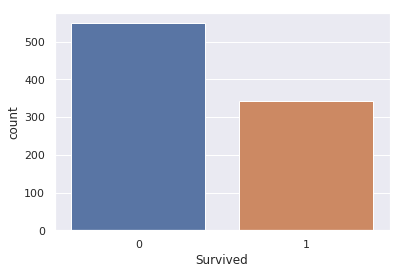

In [0]:
# Figures inline and set visualization style
% matplotlib inline
import seaborn as sns
sns.set()
sns.countplot(x='Survived', data=df_train);      #lets see how many people survived

In [0]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

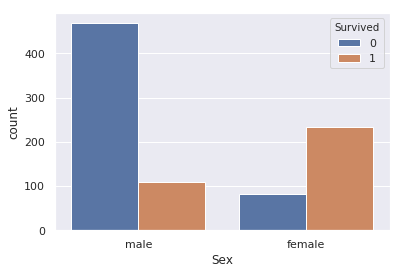

In [0]:
#sns.countplot(x='Sex', data=df_train);
#sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train);

sns.countplot('Sex',hue='Survived',data=df_train)

In [0]:
# count total passangers and groupby sex, total males and total female passangers in data set
df_train.groupby(['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [0]:
print('Total no of female survived:',df_train[df_train.Sex == 'female'].Survived.sum())
print('Total no of female passangers:',df_train[df_train.Sex == 'female'].Survived.count())
print('Percentage of female survived',df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())

print('Total no of male survived:',df_train[df_train.Sex == 'male'].Survived.sum())
print('Total no of male passangers:',df_train[df_train.Sex == 'male'].Survived.count())
print('Percentage of male survived:',df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())

Total no of female survived: 233
Total no of female passangers: 314
Percentage of female survived 0.7420382165605095
Total no of male survived: 109
Total no of male passangers: 577
Percentage of male survived: 0.18890814558058924


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


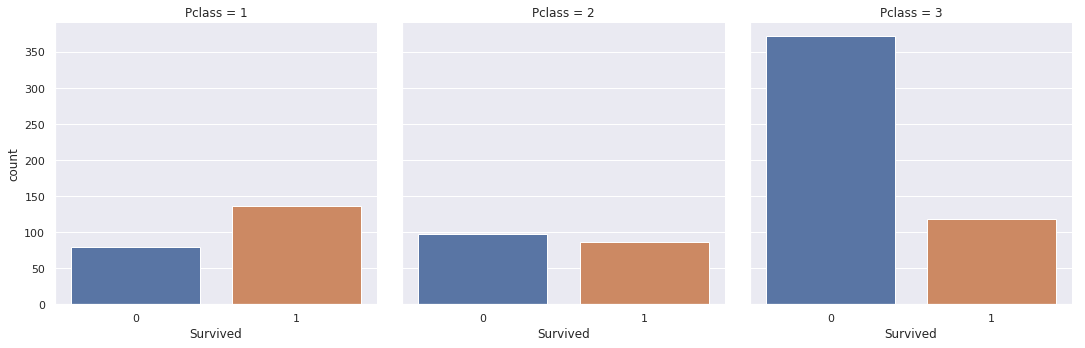

In [0]:
# Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the 
#feature 'Pclass'
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);

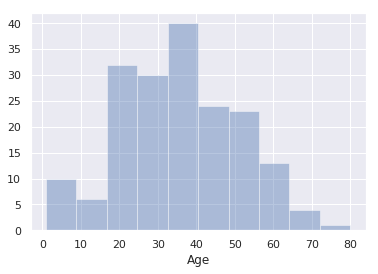

In [0]:
# Use seaborn to plot a histogram of the 'Age' column of df_train. You'll need to drop null values before doing so
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False);

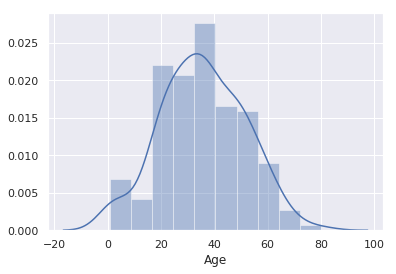

In [0]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=True);

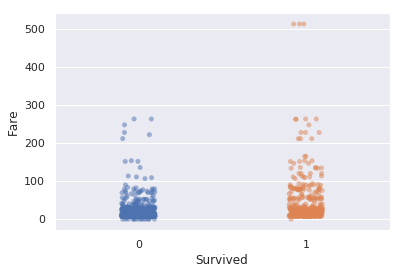

In [0]:
# Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.5, jitter=True);

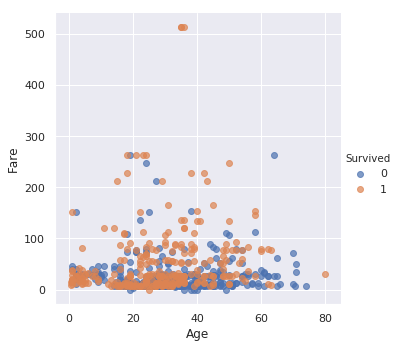

In [0]:
# Use seaborn to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.7});

#Feature Engineering: 
Remove/ fill NaNs and process dataframe in order to clean and make ready to feed the machine learning algorithm.

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


So here is my intuition I want my model to increase the probability of survival rate for woman because when I watched the movie, I realized that the woman and children were first to go in the lifeboat

Importance features: Pclass	Sex	Age	SibSp	Fare	Cabin	Embarked

In [0]:
df_train.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [0]:
df_test.median()

PassengerId    1100.5000
Pclass            3.0000
Age              27.0000
SibSp             0.0000
Parch             0.0000
Fare             14.4542
dtype: float64

In [0]:
df_train['Age'] = df_train.Age.fillna(df_train.Age.median())
df_train['Fare'] = df_train.Fare.fillna(df_train.Fare.median())

# Check out info of data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
df_test['Age'] = df_test.Age.fillna(df_test.Age.median())
df_test['Fare'] = df_test.Fare.fillna(df_test.Fare.median())

# Check out info of data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


As Age and Fare were numerical values, it was easy to fill NaN values(either with mean or median values of respective feature, however placing median value will introduce less error as its the most repeatitive data in that column).

Most of the machine learning algorithms takes numerical inputs in their training sets. Now we cast male and female values of 'Sex' to numerical value by applying get_ dummies() to 'Sex' column of dataset.

In [0]:
df_train = pd.get_dummies(df_train, columns=['Sex'], drop_first=False)

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


The new column 'Sex_male' will be extented to the existing dataframe while removing the original 'Sex' column.

drop_first=True, drops the Sex_female of the dummy column of the new data frame. drop_first=False, we will have 'Sex_female' and 'Sex_male' columns extended to our original dataframe removing the original 'Sex column'.

In [0]:
df_test = pd.get_dummies(df_test, columns=['Sex'], drop_first=False)

In [0]:
df_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,1,0


In [0]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], drop_first=False)

In [0]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [0]:
df_test = pd.get_dummies(df_test, columns=['Embarked'], drop_first=False)

In [0]:
df_test.head(5)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1


#The Model


In [0]:
# Select columns and view head, those columns will be the features for machine learning algorithm
training_vectors = df_train[['Pclass','Age', 'SibSp', 'Fare', 'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S']]
training_vectors.head()

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,0,1,0,0,1
1,1,38.0,1,71.2833,1,0,1,0,0
2,3,26.0,0,7.9250,1,0,0,0,1
3,1,35.0,1,53.1000,1,0,0,0,1
4,3,35.0,0,8.0500,0,1,0,0,1


Now these features (Sex_male, Fare, Age, Pclas, Sibsp, Embarked_C, Embarked_Q, Embarked_S) will be our training_vectors (X) and corresponding target vectors (Y) (Survived) will be used to build our machine learning model.

In [0]:
target_vectors=df_train['Survived']

In [0]:
testing_vectors = df_test[['Pclass','Age', 'SibSp', 'Fare', 'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S']]
testing_vectors.head()

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,7.8292,0,1,0,1,0
1,3,47.0,1,7.0000,1,0,0,0,1
2,2,62.0,0,9.6875,0,1,0,1,0
3,3,27.0,0,8.6625,0,1,0,0,1
4,3,22.0,1,12.2875,1,0,0,0,1


##RandomForestClassifier

In [0]:
#lets first use random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(training_vectors, target_vectors)
predictions = model.predict(testing_vectors)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


##ExtraTreesClassifier

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

extra = ExtraTreesClassifier()
extra.fit(training_vectors, target_vectors)

third_predictions = model.predict(testing_vectors)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': third_predictions})
output.to_csv('my_third_submission.csv', index=False)
print("Your third submission was successfully saved!")

Your third submission was successfully saved!


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##DecisionTreeClassifier

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

depth_range = range(1,10)
leaf_range = range(1,15)
param_grid = {"max_depth":depth_range, "min_samples_leaf":leaf_range}

ds_model = DecisionTreeClassifier()
grid = GridSearchCV(ds_model,param_grid,cv=10,scoring="accuracy")
grid.fit(training_vectors, target_vectors)

ds_model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
ds_model.fit(training_vectors, target_vectors)

target_vectors_predict = ds_model.predict(training_vectors)
testing_vectors_predict = ds_model.predict(testing_vectors)

print("Accuracy score train:", accuracy_score(training_vectors,target_vectors_predict))
print("Accuracy score test:", accuracy_score(testing_vectors,testing_vectors_predict))


ValueError: ignored

In [0]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': testing_vectors_predict})
output.to_csv('my_second_submission.csv', index=False)
print("Your second submission was successfully saved!")

#References
https://www.kaggle.com/alexisbcook/titanic-tutorial